In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving gs2.csv to gs2.csv


In [ ]:
df2 = pd.read_csv('gs2.csv')
print(df2.head())

         Date        Open        High         Low       Close   Volume  \
0  2021-02-26  325.769989  328.679993  319.040009  319.480011  3732200   
1  2021-03-01  325.000000  331.040009  323.309998  329.920013  2957800   
2  2021-03-02  330.000000  336.190002  329.510010  330.940002  2850300   
3  2021-03-03  333.679993  340.100006  333.250000  334.429993  3606300   
4  2021-03-04  333.130005  339.760010  323.920013  329.290009  3647600   

   Close_diff  
0   -8.279999  
1   10.440002  
2    1.019989  
3    3.489991  
4   -5.139984  


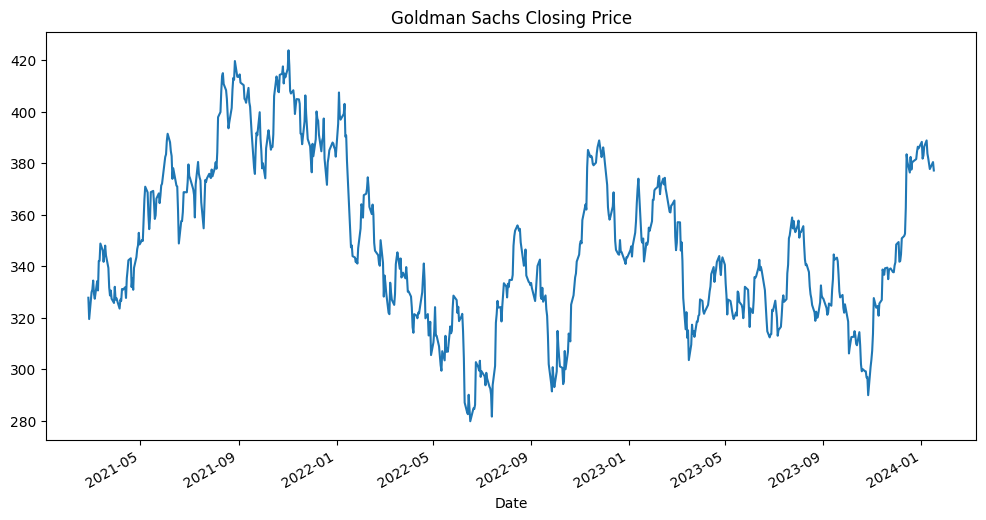

In [ ]:
# index datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# illustrate close
df['Close'].plot(title='GS Closing Price', figsize=(12, 6))
plt.show()

In [ ]:
def test_stationarity(timeseries):
    print('Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(df['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.726258
p-value                          0.069604
#Lags Used                       1.000000
Number of Observations Used    726.000000
Critical Value (1%)             -3.439389
Critical Value (5%)             -2.865529
Critical Value (10%)            -2.568894
dtype: float64


<Axes: xlabel='Date'>

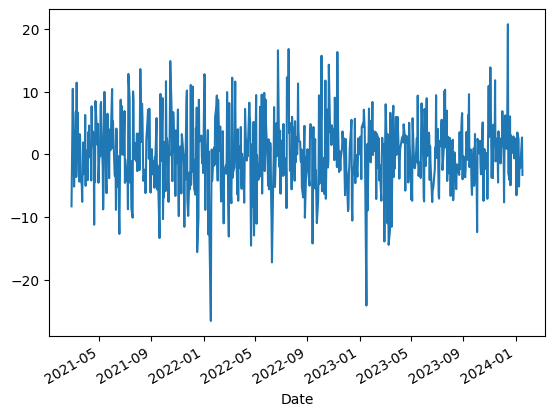

In [ ]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
df['Close_diff'].dropna().plot()

In [ ]:
print(df.head())

                  Open        High         Low       Close   Volume  \
Date                                                                  
2021-02-25  333.329987  335.809998  326.290009  327.760010  4244000   
2021-02-26  325.769989  328.679993  319.040009  319.480011  3732200   
2021-03-01  325.000000  331.040009  323.309998  329.920013  2957800   
2021-03-02  330.000000  336.190002  329.510010  330.940002  2850300   
2021-03-03  333.679993  340.100006  333.250000  334.429993  3606300   

            Close_diff  
Date                    
2021-02-25         NaN  
2021-02-26   -8.279999  
2021-03-01   10.440002  
2021-03-02    1.019989  
2021-03-03    3.489991  


In [ ]:
df.to_csv('gs1s.csv')
files.download('gs1s.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def test_stationarity(timeseries):
    print('Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(df2['Close_diff'])

Results of Dickey-Fuller Test:
Test Statistic                 -24.137578
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    726.000000
Critical Value (1%)             -3.439389
Critical Value (5%)             -2.865529
Critical Value (10%)            -2.568894
dtype: float64


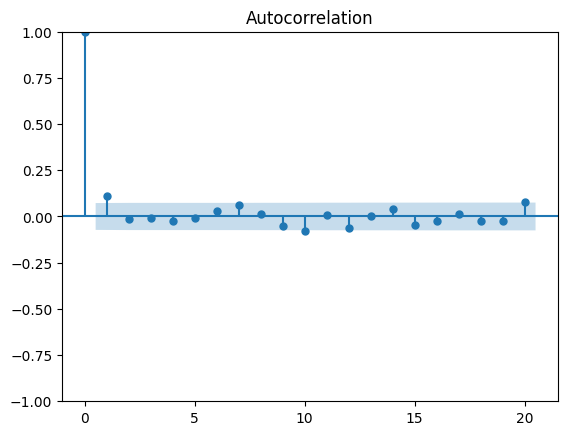

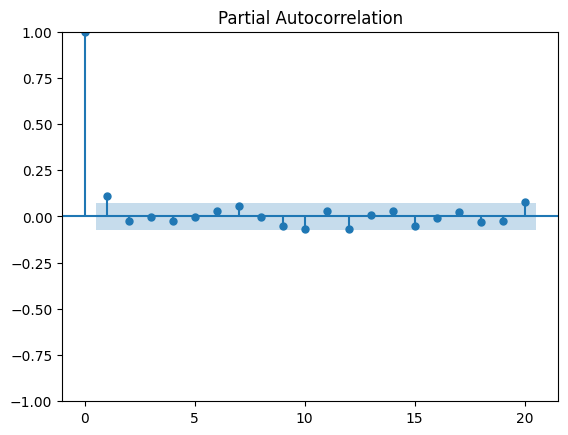

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2['Close_diff'], lags=20)
plt.show()

plot_pacf(df2['Close_diff'], lags=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# modelfit
model = ARIMA(df2['Close'], order=(20, 1, 20))
fitted_model = model.fit()

# model summary
print(fitted_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  727
Model:               ARIMA(20, 1, 20)   Log Likelihood               -2254.475
Date:                Thu, 18 Jan 2024   AIC                           4590.949
Time:                        23:35:35   BIC                           4779.039
Sample:                             0   HQIC                          4663.534
                                - 727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3760      0.719      0.523      0.601      -1.033       1.785
ar.L2          0.1473      0.661      0.223      0.824      -1.148       1.443
ar.L3         -0.6595      0.546     -1.207      0.2

In [ ]:
df.shape

(727, 7)

In [ ]:
# fit model onto dataset
model = ARIMA(df['Close'], order=(1, 1, 1))
fitted_model = model.fit()

# Generate predictions and match against results
predictions = fitted_model.predict(start=1, end=len(df['Close'])-1, typ='levels')
actual = df['Close'].iloc[1:]

#index predictions to actual results
predictions.index = actual.index

# Calculate directional accuracy
directional_accuracy = np.mean(np.sign(actual.diff().dropna()) == np.sign(predictions.diff().dropna()))
print(f"The model's directional accuracy is {directional_accuracy:.2%}")

The model's directional accuracy is 53.52%


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df['Close'][0:train_size], df['Close'][train_size:]

p_values = [1, 2, 3, 4]
q_values = [1, 2, 3, 4]
best_score, best_cfg = float("inf"), None

for p in p_values:
    for q in q_values:
        order = (p, 1, q)
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            error = mean_squared_error(test, predictions)
            if error < best_score:
                best_score, best_cfg = error, order
            print('ARIMA%s RMSE=%.3f' % (order,error))
        except:
            continue

print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

ARIMA(1, 1, 1) RMSE=591.481
ARIMA(1, 1, 2) RMSE=595.306
ARIMA(1, 1, 3) RMSE=594.978
ARIMA(1, 1, 4) RMSE=591.720
ARIMA(2, 1, 1) RMSE=591.827
ARIMA(2, 1, 2) RMSE=590.212
ARIMA(2, 1, 3) RMSE=590.132


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 4) RMSE=591.986
ARIMA(3, 1, 1) RMSE=591.863


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) RMSE=611.329


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) RMSE=589.955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) RMSE=590.081
ARIMA(4, 1, 1) RMSE=591.895
ARIMA(4, 1, 2) RMSE=591.961


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(4, 1, 3) RMSE=592.440
ARIMA(4, 1, 4) RMSE=590.006
Best ARIMA(3, 1, 3) RMSE=589.955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
def walk_forward_validation(data, p_value, d_value, q_value):
    predictions = list()
    train, test = data[:726], data[726:]
    history = [x for x in train]

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(p_value, d_value, q_value))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test.iloc[t])

    # calc mse
    error = mean_squared_error(test, predictions)
    return error

p_value, d_value, q_value = 2, 1, 2  # Replace with the values you want to test
rmse = sqrt(walk_forward_validation(df['Close'], p_value, d_value, q_value))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.666
